# Trabajo Semanal N°4
<img src="logo_UTN.svg" title="Logo UTN" align="right" width="150"> 

## Teoría de Circuitos II
### Alumno: Federico Albero
### Curso: R4001

#### Plantilla de diseño del filtro:
<img src="plantilla_TS4.png" title="Consigna" align="left" width="400"> 

#### Resolución analítica ejercicios 1, 2, 3 y 4:

In [1]:
from IPython.display import IFrame
IFrame("./TS4_FAlbero_R4001.pdf", width=1000, height=1000)

#### Bonus II: Simulaciones numéricas y circuitales

<p style="text-align: center;">Simulación numérica</p>

#### LPF-Butterworth_orden-3_ripple_1dB

<IPython.core.display.Math object>

#### LPF-Butterworth_orden-3_ripple_1dB

<IPython.core.display.Math object>

Singularidades LPF Butterwoth
Polos: [-0.5+0.8660254j -1. -0.j        -0.5-0.8660254j]
Ceros: []
Singularidades HPF Maxima Planicidad
Polos: [-0.7983545 +0.j         -0.39917725+0.69139528j -0.39917725-0.69139528j]
Ceros: [0. 0. 0.]


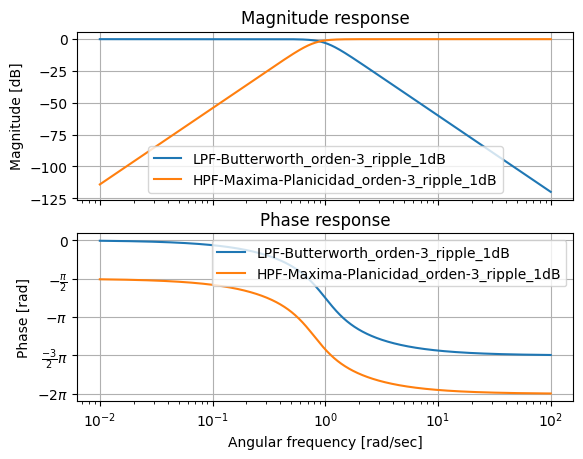

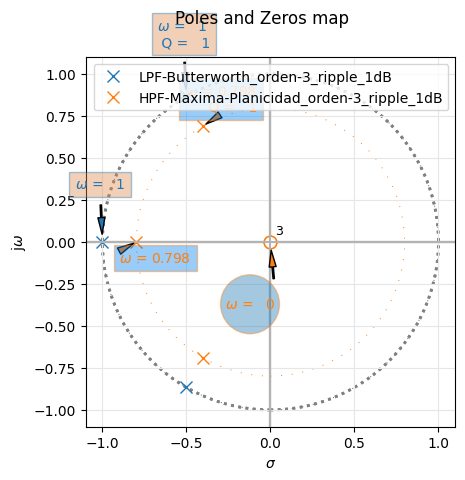

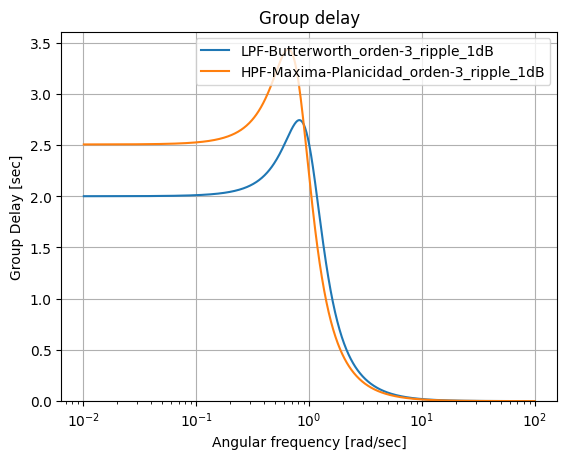

In [2]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Thu May 25 23:57:48 2023

@author: fede23
"""

import numpy as np
import scipy.signal as sig
import matplotlib.pyplot as plt

from pytc2.sistemas_lineales import analyze_sys, tf2sos_analog, pretty_print_SOS
from pytc2.general import print_subtitle

# esto dejarlo así, no tocar, es para graficar
all_sys = []
filter_names = []

#%% Valores de la plantilla de diseño y parametros %%#

# Valores plantilla de diseño:
alpha_max = 1
alpha_min = 30
wp = 1
ws = 0.25 # frecuencia normalizada del pasa-altos objetivo
omega_s = 1/ws # frecuencia normalizada del pasa-bajos prototipo
n = 3 # orden del filtro a diseñar

#%% Transferencia LPF Butter %%#

ee = (10**(alpha_max/10) - 1) # epsilon²
e = np.sqrt(ee) # epsilon
alpha_min_n3 = 10*(np.log10(1 + (ee)*(omega_s**(2*n)))) ##alpha_min_n3 > 30dB -> n=3
wb = e**(1/n) # norma de renormalización LPF -> HPF

# obtengo ceros, polos y ganancia de un Butter de orden n
z1,p1,k1 = sig.buttap(n) 
# obtengo num y denum correspondiente a los z,p,k anteriores
num1, den1 = sig.zpk2tf(z1,p1,k1)
# transferencia del LPF Butter
tf1 = sig.TransferFunction( num1, den1 )
all_sys.append(tf1)
label1 = 'LPF-Butterworth' + '_orden-' + str(n) + '_ripple_' + str(alpha_max) + 'dB' # etiqueta
print_subtitle(label1)
# factorizamos en SOS's
sos1 = tf2sos_analog(num1, den1)
pretty_print_SOS(sos1, mode='omegayq')
filter_names.append(label1)

#%% Transferencia HPF Maxima Planicidad %%#

# Transformo el pasabajos-prototipo normalizado en un pasa altos con frecuencia de corte wb
num2, den2 = sig.lp2hp(num1, den1, wb) 
# Obtengo z,p,k de la transferencia en MP finalmente
z2,p2,k2 = sig.tf2zpk(num2, den2)
# transferencia HPF Maxima Planicidad
tf2 = sig.TransferFunction( num2, den2 ) # Función transferencia
all_sys.append(tf2)
label2 = 'HPF-Maxima-Planicidad' + '_orden-' + str(n) + '_ripple_' + str(alpha_max) + 'dB' # etiqueta
print_subtitle(label1)
# factorizamos en SOS's
sos2 = tf2sos_analog(num2, den2)
pretty_print_SOS(sos2, mode='omegayq')
filter_names.append(label2)

#%% Coeficientes de las transferencias y ZyP %%#

#print(f'denominador etapa 1: S² + {-2*p_real1}*S + {w0_etapa1**2}')
print('Singularidades LPF Butterwoth')
print(f'Polos: {p1}')
print(f'Ceros: {z1}')

print('Singularidades HPF Maxima Planicidad')
print(f'Polos: {p2}')
print(f'Ceros: {z2}')

plt.close('all') # cierro todo antes de graficar nuevamente por las dudas
analyze_sys( all_sys, filter_names)


**Análisis:** Mediante la presente simulación, se pudieron verificar los siguientes aspectos obtenidos previamente de manera analítica:
* Valores de los coeficientes del numerador y denominador de las transferencias $T_{LP(w)}$ y $T_{HP(w)}$.
* Diagrama de polos y ceros de cada filtro y su comparación.
* Gráfico de módulo $|T_{(w)}|$ y fase $\varphi_{(w)}$ de cada función transferencia.
* Descomposición de transferencia de orden n=3 en una sección de orden orden 2 y otra de orden 1.

<p style="text-align: center;">Simulaciones circuitales</p>

#### _Red pasiva:_

##### Circuito
<img src="TS4_red-pasiva_parametrizada_circuito.png" title="Red pasiva"> 

##### Grafico
<img src="TS4_red-pasiva_parametrizada_grafico.png" title="Red pasiva"> 

**Análisis:** En este caso se utilizó una parametrización en LTSpice para poder obtener valores de frecuencia angular normalizada en el eje X frecuencial de la gráfica. Habiendo utilizado como norma de frecuencia $\Omega_w=2\pi\cdot F_p=2\pi\cdot 40KHz$, se obtiene una frecuencia de detención de $\omega_s=0.25\,rad/sec$ y una frecuencia de paso $\omega_p=1\,rad/sec$.
Se puede apreciar como en $\omega_s$ hay una atenuación mayor a los 30dB y en $\omega_p$ hay aproximadamente -1dB. Esta excesiva proximidad entre los valores obtenidos y los especificados en la plantilla de diseño se debe a que el orden n=3 del filtro cumple por muy poco las especificaciones de diseño. $\alpha_{min(n=3)}$ es levemente superior a 30dB.

#### _Red pasiva "desnomalizada":_

##### Circuito
<img src="TS4_red-pasiva_parametrizada_v2_circuito.png" title="Red pasiva 2"> 

##### Grafico
<img src="TS4_red-pasiva_parametrizada_v2_grafico.png" title="Red pasiva 2"> 

**Análisis:** Para este caso, se desnormalizaron los valores de los componentes en frecuencia para así poder obtener el gráfico real de la respuesta en frecuencia del filtro pasa altos de orden 3. Se puede apreciar como a partir de la frecuencia de paso $Fp=40KHz$ el filtro entrega una máxima planicidad en 0dB para su transferencia. En $Fs=10KHz$ el filtro ya presenta un atenuación levemente superior a los 30dB.

#### _Red activa:_

##### Circuito
<img src="TS4_red-activa_circuito.png" title="Red activa"> 

##### Grafico
<img src="TS4_red-activa_grafico.png" title="Red activa"> 

**Análisis:** En esta ocasión se "activó" el circuito, reemplazando los inductores por un circuito girador con amplificadores operaciones (_"GIC de Antoniou"_). La función de este circuito activo es "emular" la impedancia de un inductor de la siguiente manera: $Z_{L(S)}=S\cdot L_{eq}=S\cdot R²\,C$. 